In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('../data/T1.csv')

In [3]:
df.drop(columns=df[['Date/Time','Theoretical_Power_Curve (KWh)']],inplace=True)
y=df['LV ActivePower (kW)']
df.drop(columns=['LV ActivePower (kW)'],axis=1,inplace=True)

In [4]:
df['Wind Direction (°)']=(df['Wind Direction (°)']-df['Wind Direction (°)'].mean())/(df['Wind Direction (°)'].std())
df['Wind Speed (m/s)']=(df['Wind Speed (m/s)']-df['Wind Speed (m/s)'].mean())/(df['Wind Speed (m/s)'].std())

In [5]:
y_train=y[:42283] #data till october
y_test=y[42283:]
X_train=df.iloc[:42283]
X_test=df.iloc[42283:]

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error

xgr=XGBRegressor(n_estimators=800, objective='reg:squarederror', seed=None, verbosity=1)
sm=SVR(gamma='auto',C=50,epsilon=0.3)
rf=RandomForestRegressor(n_estimators=500,max_depth=4)
lr=LinearRegression()

model=VotingRegressor([('lr',lr), ('rf',rf),('sm', sm),('xgr',xgr)], weights=[1,2,3,4])

C:\Users\ujjwa\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [7]:
Model = model.fit(X_train, y_train)

C:\Users\ujjwa\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [8]:
y_pred = Model.predict(X_test)

In [28]:
# print(y_pred)
print('Score: ', r2_score(y_test, y_pred) * 100)
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_pred)))


Score:  88.33690652415154
RMSE:  469.011376768353


In [10]:
import joblib
joblib.dump(Model, 'ML ensemble Model.pkl') 

['ML ensemble Model.pkl']

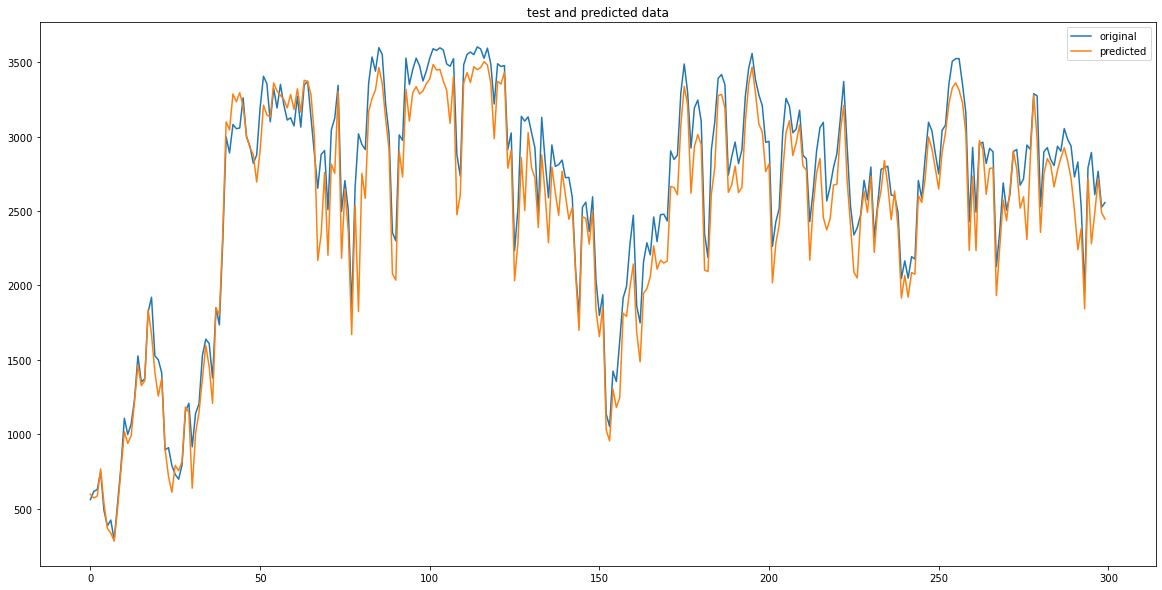

In [25]:
x_ax = range(len(y_test[500: 800]))
fig = plt.figure(figsize=(20,10))
plt.plot(x_ax, y_test[500: 800], label="original")
plt.plot(x_ax, y_pred[500: 800], label="predicted")
plt.title("test and predicted data")
plt.legend(loc='upper right')
plt.show()